In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.linear_model import LogisticRegression

from modules.model_tester import find_n_neighbors, test_model

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./prepared_datasets/normalized_dataset.csv')
df.head()

,2022-03-03 00:00:00,2022-03-04 00:00:00,2022-03-05 00:00:00,2022-03-06 00:00:00,2022-03-07 00:00:00,2022-03-08 00:00:00,2022-03-09 00:00:00,2022-03-10 00:00:00,2022-03-11 00:00:00,2022-03-12 00:00:00,...,2022-03-23 00:00:00,2022-03-24 00:00:00,2022-03-25 00:00:00,2022-03-26 00:00:00,2022-03-27 00:00:00,2022-03-28 00:00:00,2022-03-29 00:00:00,2022-03-30 00:00:00,2022-03-31 00:00:00,target
0,0.0,0.0,0.000000,0.083333,0.227273,0.117647,0.000000,0.000,0.000000,0.125,...,1.000000,0.0,0.75,0.50,0.000000,0.666667,0.0,0.000000,0.0,1.0
1,0.0,0.0,0.000000,0.041667,0.227273,0.235294,0.000000,0.000,0.000000,0.000,...,0.333333,1.0,0.75,0.25,0.333333,0.000000,0.0,0.000000,0.5,1.0
2,0.0,0.0,0.142857,0.208333,0.318182,0.117647,0.111111,0.000,0.142857,0.250,...,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.0,0.000000,0.0,1.0
3,0.0,0.0,0.000000,0.166667,0.500000,0.235294,0.000000,0.250,0.000000,0.125,...,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.0,0.333333,0.0,1.0
4,0.0,0.0,0.000000,0.000000,0.318182,0.647059,0.777778,0.625,0.714286,0.125,...,0.000000,0.0,0.00,0.25,0.000000,0.000000,0.0,0.333333,0.0,1.0


In [4]:
y, X = df['target'], df.drop('target', axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)

## k-Nearest Neighbors

In [6]:
knn = KNeighborsClassifier()

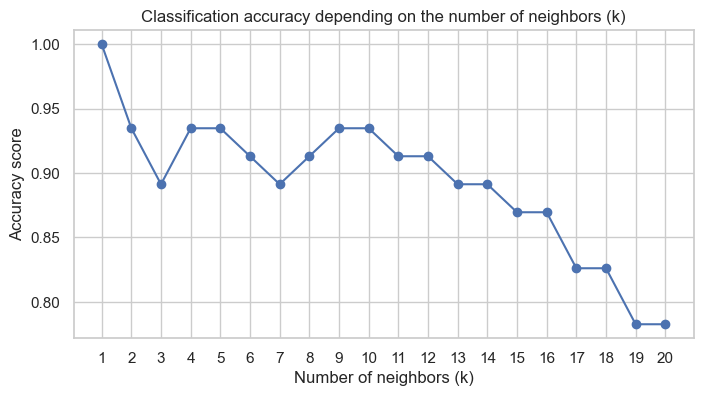

In [7]:
find_n_neighbors(knn, X_train, y_train)

In [8]:
knn.set_params(n_neighbors=9)

KNeighborsClassifier(n_neighbors=9)

 CV Scores: [0.91666667 0.83333333 0.72727273 0.90909091]
 CV Mean score: 0.8465909090909092


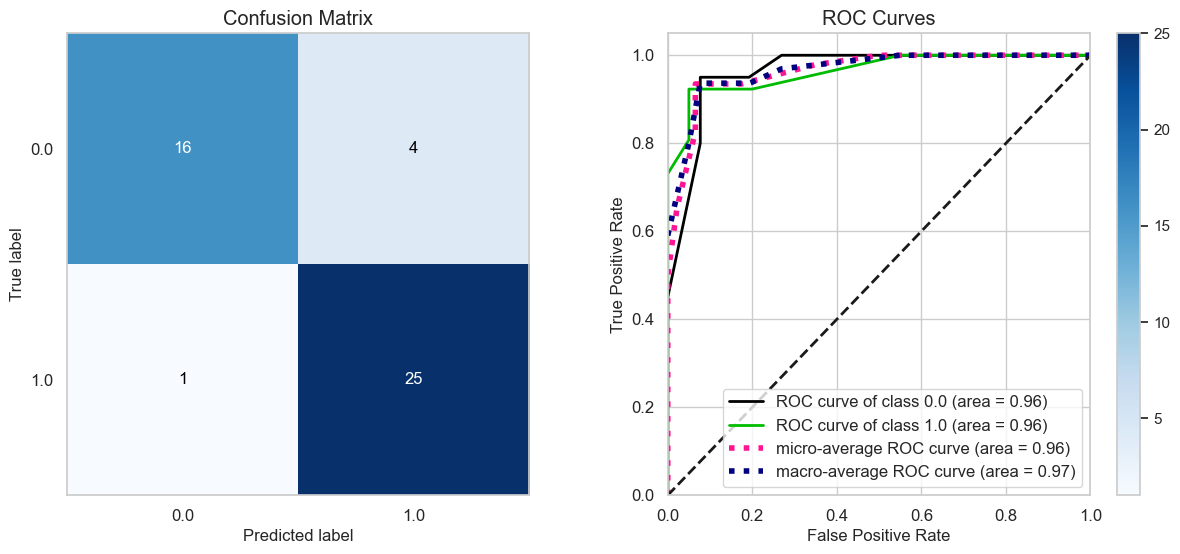

In [9]:
test_model(knn, X_train, y_train)

In [10]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [11]:
knn_pred = knn.predict(X_test)

In [12]:
f1_score(knn_pred, y_test, average="weighted")

0.7430107526881721

In [13]:
accuracy_score(knn_pred, y_test)

0.7419354838709677

## Nearest Centroid

In [14]:
nc = NearestCentroid()

 CV Scores: [0.83333333 0.83333333 1.         1.        ]
 CV Mean score: 0.9166666666666667
This classifier has no attribute 'predict_proba' 


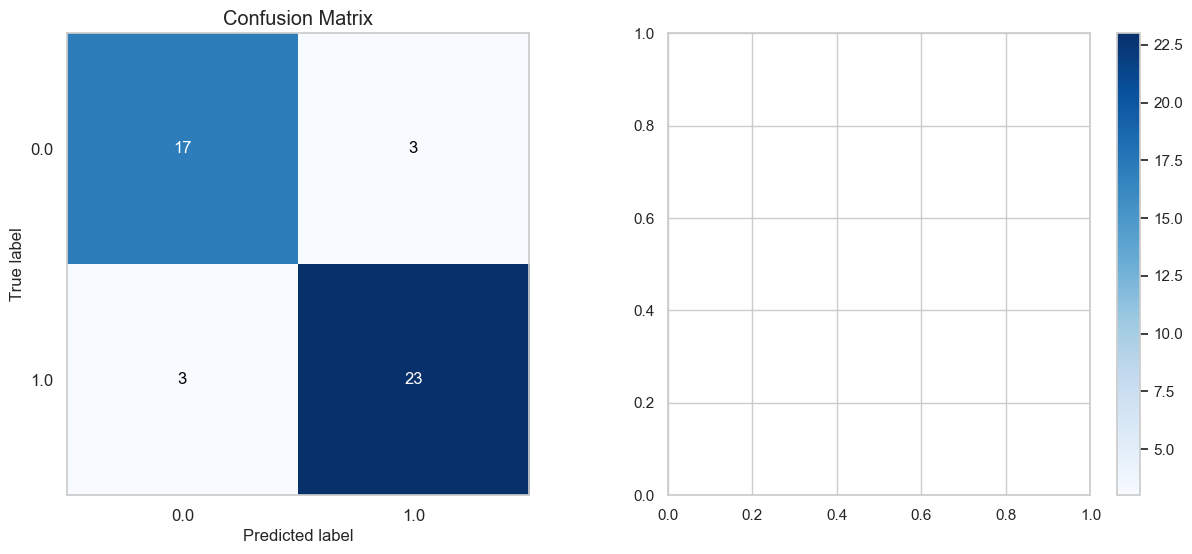

In [15]:
test_model(nc, X_train, y_train)

In [16]:
nc.fit(X_train, y_train)

NearestCentroid()

In [17]:
nc_pred = nc.predict(X_test)

In [18]:
f1_score(nc_pred, y_test, average="weighted")

0.7096774193548386

In [19]:
accuracy_score(nc_pred, y_test)

0.7096774193548387

## Logistic Regression

In [20]:
lr = LogisticRegression(solver='sag', max_iter=3, C=0.15, class_weight='balanced')

 CV Scores: [0.83333333 0.83333333 0.90909091 0.81818182]
 CV Mean score: 0.8484848484848485


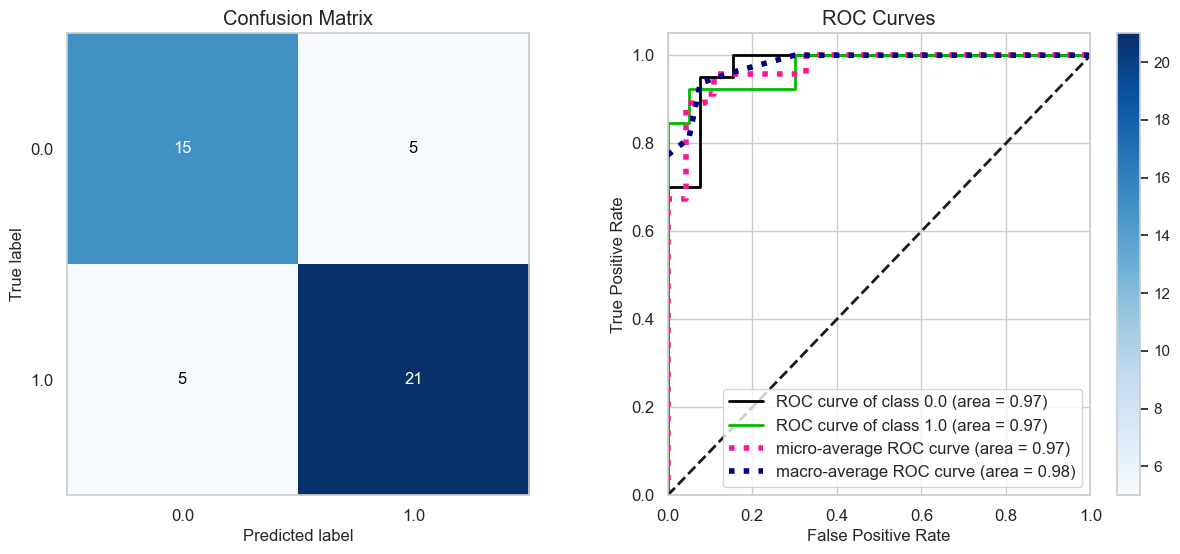

In [21]:
test_model(lr, X_train, y_train)

In [22]:
lr.fit(X_train, y_train)

LogisticRegression(C=0.15, class_weight='balanced', max_iter=3, solver='sag')

In [23]:
lr_pred = lr.predict(X_test)

In [24]:
f1_score(lr_pred, y_test, average="weighted")

0.8749292586304471

In [25]:
accuracy_score(lr_pred, y_test)

0.8709677419354839